# Week 4: Wrangling Data  - cleaning

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**TODOs:** 
- [ ] Clean the notebook
- [ ] Add explanations and instructions
- [ ] Add data sources (links)
- [ ] Incorporate `pandas-profiling` package if possible

other strategies with nan (replace with zero or average) also thinks about the bias being introduced, understanding why it is nan, 

outliers (in describing dataset)




## Part 1: Import dataset

**Objectives:**  
1. File paths
2. Read data with pandas
3. Data encoding (for example, utf-8, latin-1)

Techniques: `pd.read_csv(), drop()`

In [2]:
# rgdp = pd.read_csv("../data/CAGDP9__ALL_AREAS_2001_2020.csv")
# rgdp

In [3]:
rgdp = pd.read_csv("../data/CAGDP9__ALL_AREAS_2001_2020.csv", encoding="latin-1")
rgdp

C:\Users\Yiyan\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"""00000""",United States,,CAGDP9,1.0,...,All industry total,Thousands of chained 2012 dollars,13263417000,13488357000,...,15891534000,16253970000,16553348000,16932051000,17390295000,17680274000,18079084000,18606787000,19032672000,18384687000
1,"""00000""",United States,,CAGDP9,2.0,...,Private industries,Thousands of chained 2012 dollars,11452473000,11651910000,...,13747760000,14094484000,14359460000,14745226000,15197800000,15468414000,15852630000,16358199000,16773564000,16142272000
2,"""00000""",United States,,CAGDP9,3.0,11,"Agriculture, forestry, fishing and hunting",Thousands of chained 2012 dollars,154754000,160443000,...,184277000,178689000,207512000,208573000,221860000,234553000,231022000,237898000,223343000,254650000
3,"""00000""",United States,,CAGDP9,6.0,21,"Mining, quarrying, and oil and gas extraction",Thousands of chained 2012 dollars,272249000,279759000,...,322257000,360523000,374021000,414501000,451234000,427227000,436020000,436723000,488271000,438565000
4,"""00000""",United States,,CAGDP9,10.0,22,Utilities,Thousands of chained 2012 dollars,214832000,222238000,...,276943000,280650000,277156000,266289000,266387000,280734000,284085000,283106000,286552000,298558000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108051,"""98000""",Far West,8.0,CAGDP9,92.0,...,Private services-providing industries 3/,Thousands of chained 2012 dollars,1564289870,1608644362,...,1990300228,2043087768,2099960167,2169518763,2267778505,2339057085,2456138729,2568635335,2670273983,2570880841
108052,Note: See the included footnote file.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108053,CAGDP9: Real GDP by county and metropolitan ar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108054,"Last updated: December 8, 2021 -- new statisti...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Why there is a mixed type warning: TODO

Drop last four rows:

In [4]:
# rgdp[0:108052]

In [5]:
rgdp = rgdp.drop(rgdp.index[-4:], axis=0)
rgdp

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"""00000""",United States,,CAGDP9,1.0,...,All industry total,Thousands of chained 2012 dollars,13263417000,13488357000,...,15891534000,16253970000,16553348000,16932051000,17390295000,17680274000,18079084000,18606787000,19032672000,18384687000
1,"""00000""",United States,,CAGDP9,2.0,...,Private industries,Thousands of chained 2012 dollars,11452473000,11651910000,...,13747760000,14094484000,14359460000,14745226000,15197800000,15468414000,15852630000,16358199000,16773564000,16142272000
2,"""00000""",United States,,CAGDP9,3.0,11,"Agriculture, forestry, fishing and hunting",Thousands of chained 2012 dollars,154754000,160443000,...,184277000,178689000,207512000,208573000,221860000,234553000,231022000,237898000,223343000,254650000
3,"""00000""",United States,,CAGDP9,6.0,21,"Mining, quarrying, and oil and gas extraction",Thousands of chained 2012 dollars,272249000,279759000,...,322257000,360523000,374021000,414501000,451234000,427227000,436020000,436723000,488271000,438565000
4,"""00000""",United States,,CAGDP9,10.0,22,Utilities,Thousands of chained 2012 dollars,214832000,222238000,...,276943000,280650000,277156000,266289000,266387000,280734000,284085000,283106000,286552000,298558000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108047,"""98000""",Far West,8.0,CAGDP9,88.0,"42, 44-45",Trade,Thousands of chained 2012 dollars,299948334,310133752,...,334015074,337467786,349876101,365797315,388328048,391594880,407930747,417922582,430420400,417100557
108048,"""98000""",Far West,8.0,CAGDP9,89.0,"22, 48-49",Transportation and utilities,Thousands of chained 2012 dollars,92348610,98270500,...,120757328,120910902,122603598,122964944,126603943,135513257,143982835,149511990,157153056,142336514
108049,"""98000""",Far West,8.0,CAGDP9,90.0,"31-33, 51",Manufacturing and information,Thousands of chained 2012 dollars,332347411,334231144,...,526989191,537865474,587660055,619211964,671787004,711230142,778240248,838292659,893126941,919323956
108050,"""98000""",Far West,8.0,CAGDP9,91.0,...,Private goods-producing industries 2/,Thousands of chained 2012 dollars,416108373,409007552,...,500612965,517109694,537204262,557275562,587813867,604985303,640423400,674839219,695172659,693249584


## Part 2: Learn about the dataset

**Objectives:**  
1. Dataset shape
2. Structure (columns and rows)
3. Data type

Techniques: `shape, columns, describe(), unique(), replace()`

#### Size of the dataset

In [6]:
rgdp.shape

(108052, 28)

#### Column names

In [7]:
rgdp.columns

Index(['GeoFIPS', 'GeoName', 'Region', 'TableName', 'LineCode',
       'IndustryClassification', 'Description', 'Unit', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

#### Number of counties

In [8]:
len(rgdp["GeoFIPS"].unique())

3178

#### Industry labels

How does the original dataset use indentation to structure the industries?

In [9]:
for industry in rgdp["Description"].unique():
    print(industry)

All industry total
 Private industries
  Agriculture, forestry, fishing and hunting
  Mining, quarrying, and oil and gas extraction
  Utilities
  Construction
  Manufacturing
   Durable goods manufacturing
   Nondurable goods manufacturing
  Wholesale trade
  Retail trade
  Transportation and warehousing
  Information
  Finance, insurance, real estate, rental, and leasing
   Finance and insurance
   Real estate and rental and leasing
  Professional and business services
   Professional, scientific, and technical services
   Management of companies and enterprises
   Administrative and support and waste management and remediation services
  Educational services, health care, and social assistance
   Educational services
   Health care and social assistance
  Arts, entertainment, recreation, accommodation, and food services
   Arts, entertainment, and recreation
   Accommodation and food services
  Other services (except government and government enterprises)
Government and government en

In [10]:
len(rgdp["Description"].unique())

34

In [11]:
rgdp.describe()

,LineCode
count,108052.000000
mean,52.264706
std,30.338729
min,1.000000
25%,25.000000
50%,59.500000
75%,79.000000
max,92.000000


#### Data types

Some columns are strings.

In [12]:
rgdp["GeoFIPS"]

0          "00000"
1          "00000"
2          "00000"
3          "00000"
4          "00000"
            ...   
108047     "98000"
108048     "98000"
108049     "98000"
108050     "98000"
108051     "98000"
Name: GeoFIPS, Length: 108052, dtype: object

In [13]:
rgdp["GeoName"]

0         United States
1         United States
2         United States
3         United States
4         United States
              ...      
108047         Far West
108048         Far West
108049         Far West
108050         Far West
108051         Far West
Name: GeoName, Length: 108052, dtype: object

Some columns should be numeric, but have mixed types. 

In [14]:
rgdp["2001"]

0         13263417000
1         11452473000
2           154754000
3           272249000
4           214832000
             ...     
108047      299948334
108048       92348610
108049      332347411
108050      416108373
108051     1564289870
Name: 2001, Length: 108052, dtype: object

## Part 3: Missing Values and NaNs

other strategies with nan (replace with zero or average) also thinks about the bias being introduced, understanding why it is nan,

In [15]:
rgdp[rgdp["2001"] == "(D)"][:5]

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
75,"""01001""","Autauga, AL",5,CAGDP9,13.0,"321,327-339",Durable goods manufacturing,Thousands of chained 2012 dollars,(D),(D),...,(D),(D),29905,37898,52801,79494,95910,79507,61324,49317
76,"""01001""","Autauga, AL",5,CAGDP9,25.0,"311-316,322-326",Nondurable goods manufacturing,Thousands of chained 2012 dollars,(D),(D),...,(D),(D),154296,180253,179331,174500,171988,181888,153206,167474
86,"""01001""","Autauga, AL",5,CAGDP9,64.0,55,Management of companies and enterprises,Thousands of chained 2012 dollars,(D),(D),...,(D),(D),(D),(D),(D),(D),(D),(D),(D),(D)
87,"""01001""","Autauga, AL",5,CAGDP9,65.0,56,Administrative and support and waste manage...,Thousands of chained 2012 dollars,(D),(D),...,(D),(D),(D),(D),(D),(D),15187,(D),18404,18687
89,"""01001""","Autauga, AL",5,CAGDP9,69.0,61,Educational services,Thousands of chained 2012 dollars,(D),4405,...,(D),6643,6932,6858,7126,8131,8625,10084,11905,12548


In [16]:
rgdp_test = rgdp.copy()
rgdp_test = rgdp_test.replace("(D)", -2)
rgdp_test = rgdp_test.replace("(NA)", -1)
rgdp_test[rgdp["2001"] == "(D)"][:5]

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
75,"""01001""","Autauga, AL",5,CAGDP9,13.0,"321,327-339",Durable goods manufacturing,Thousands of chained 2012 dollars,-2,-2,...,-2,-2,29905,37898,52801,79494,95910,79507,61324,49317
76,"""01001""","Autauga, AL",5,CAGDP9,25.0,"311-316,322-326",Nondurable goods manufacturing,Thousands of chained 2012 dollars,-2,-2,...,-2,-2,154296,180253,179331,174500,171988,181888,153206,167474
86,"""01001""","Autauga, AL",5,CAGDP9,64.0,55,Management of companies and enterprises,Thousands of chained 2012 dollars,-2,-2,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
87,"""01001""","Autauga, AL",5,CAGDP9,65.0,56,Administrative and support and waste manage...,Thousands of chained 2012 dollars,-2,-2,...,-2,-2,-2,-2,-2,-2,15187,-2,18404,18687
89,"""01001""","Autauga, AL",5,CAGDP9,69.0,61,Educational services,Thousands of chained 2012 dollars,-2,4405,...,-2,6643,6932,6858,7126,8131,8625,10084,11905,12548


**Understanding NaNs:**
Why NaN values exist in out dataset? 



**Different ways to deal with NaNs:**
1. Drop the NaNs
2. Replace NaNs with zeros
3. Replace NaNs with the mean or median

Here we will simply drop all the NaNs in the dataset. 

In [17]:
rgdp_test = rgdp.copy()
rgdp_test = rgdp_test.replace("(D)", np.nan)
rgdp_test = rgdp_test.replace("(NA)", np.nan)
rgdp_test[rgdp["2001"] == "(D)"][:5]

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
75,"""01001""","Autauga, AL",5,CAGDP9,13.0,"321,327-339",Durable goods manufacturing,Thousands of chained 2012 dollars,NaN,NaN,...,NaN,NaN,29905,37898,52801,79494,95910,79507,61324,49317
76,"""01001""","Autauga, AL",5,CAGDP9,25.0,"311-316,322-326",Nondurable goods manufacturing,Thousands of chained 2012 dollars,NaN,NaN,...,NaN,NaN,154296,180253,179331,174500,171988,181888,153206,167474
86,"""01001""","Autauga, AL",5,CAGDP9,64.0,55,Management of companies and enterprises,Thousands of chained 2012 dollars,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,"""01001""","Autauga, AL",5,CAGDP9,65.0,56,Administrative and support and waste manage...,Thousands of chained 2012 dollars,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15187,NaN,18404,18687
89,"""01001""","Autauga, AL",5,CAGDP9,69.0,61,Educational services,Thousands of chained 2012 dollars,NaN,4405,...,NaN,6643,6932,6858,7126,8131,8625,10084,11905,12548


In [63]:
rgdp_test = rgdp_test.dropna()

## Part 4: String methods and type conversions

**Objectives:**  
1. TODO

Techniques: `try, except, np.vectorize(), astype()`

data object: primary key when merging

In [19]:
# make a copy of the dataframe first
rgdp_clean = rgdp_test.copy()

Often the data we worked with will not have the desirable data type. For example, the real GDP data we have now has some entries being kept as strings. To convert these data entries to desirable data type, the most common way is to use `pandas.DataFrame.astype(type)`. For example, we can apply `astype("int64")` method to our dataset.

### Converting a specified data series

We can convert the series first, and assign it back. 

In [20]:
# understand why this will fail and how to read error message
# stackoverflow is your friend
# rgdp_test["2001"].astype(int)

In [21]:
rgdp_test["2001"].astype("int64")

0         13263417000
1         11452473000
2           154754000
3           272249000
4           214832000
             ...     
108047      299948334
108048       92348610
108049      332347411
108050      416108373
108051     1564289870
Name: 2001, Length: 63143, dtype: int64

In [22]:
for year in np.arange(2001, 2021):
    rgdp_clean[str(year)] = rgdp_test[str(year)].astype("int64")

Or we can convert many columns in a dataframe at once by passing in a dictionary. 

In [23]:
rgdp_test.astype({"2001": "int64", "2002": "int64"})

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"""00000""",United States,,CAGDP9,1.0,...,All industry total,Thousands of chained 2012 dollars,13263417000,13488357000,...,15891534000,16253970000,16553348000,16932051000,17390295000,17680274000,18079084000,18606787000,19032672000,18384687000
1,"""00000""",United States,,CAGDP9,2.0,...,Private industries,Thousands of chained 2012 dollars,11452473000,11651910000,...,13747760000,14094484000,14359460000,14745226000,15197800000,15468414000,15852630000,16358199000,16773564000,16142272000
2,"""00000""",United States,,CAGDP9,3.0,11,"Agriculture, forestry, fishing and hunting",Thousands of chained 2012 dollars,154754000,160443000,...,184277000,178689000,207512000,208573000,221860000,234553000,231022000,237898000,223343000,254650000
3,"""00000""",United States,,CAGDP9,6.0,21,"Mining, quarrying, and oil and gas extraction",Thousands of chained 2012 dollars,272249000,279759000,...,322257000,360523000,374021000,414501000,451234000,427227000,436020000,436723000,488271000,438565000
4,"""00000""",United States,,CAGDP9,10.0,22,Utilities,Thousands of chained 2012 dollars,214832000,222238000,...,276943000,280650000,277156000,266289000,266387000,280734000,284085000,283106000,286552000,298558000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108047,"""98000""",Far West,8.0,CAGDP9,88.0,"42, 44-45",Trade,Thousands of chained 2012 dollars,299948334,310133752,...,334015074,337467786,349876101,365797315,388328048,391594880,407930747,417922582,430420400,417100557
108048,"""98000""",Far West,8.0,CAGDP9,89.0,"22, 48-49",Transportation and utilities,Thousands of chained 2012 dollars,92348610,98270500,...,120757328,120910902,122603598,122964944,126603943,135513257,143982835,149511990,157153056,142336514
108049,"""98000""",Far West,8.0,CAGDP9,90.0,"31-33, 51",Manufacturing and information,Thousands of chained 2012 dollars,332347411,334231144,...,526989191,537865474,587660055,619211964,671787004,711230142,778240248,838292659,893126941,919323956
108050,"""98000""",Far West,8.0,CAGDP9,91.0,...,Private goods-producing industries 2/,Thousands of chained 2012 dollars,416108373,409007552,...,500612965,517109694,537204262,557275562,587813867,604985303,640423400,674839219,695172659,693249584


In [24]:
rgdp_test.astype({"2001": "int64", "2002": "int64"}).dtypes

GeoFIPS                    object
GeoName                    object
Region                     object
TableName                  object
LineCode                  float64
IndustryClassification     object
Description                object
Unit                       object
2001                        int64
2002                        int64
2003                       object
2004                       object
2005                       object
2006                       object
2007                       object
2008                       object
2009                       object
2010                       object
2011                       object
2012                       object
2013                       object
2014                       object
2015                       object
2016                       object
2017                       object
2018                       object
2019                       object
2020                       object
dtype: object

Now we can see the `dtype` for 2001 and 2002 are `int64`.  

### Converting the entire dataframe

Alternatively, we can convert the entire dataframe to a data type if we want. 

In [25]:
sample_df = pd.DataFrame({"e": ["1", "4", "8"], 
                          "c": ["1", "4", "8"], 
                          "o": [1, 4, 8], 
                          "n": [1.0, 4.0, 8.0]
                         })
sample_df

,e,c,o,n
0,1,1,1,1.0
1,4,4,4,4.0
2,8,8,8,8.0


In [26]:
sample_df.astype(int)

,e,c,o,n
0,1,1,1,1
1,4,4,4,4
2,8,8,8,8


We can also convert data type into `float`, `str`, etc. using the `astype` method on the entire dataframe or some specified data series. Pandas also provides a `pandas.to_numeric()` function to easier convert different data types into numeric. 

### Vectorized functions and custom type conversion functions

But sometimes the dataset entries may be harder to convert to numerical values, and the easy way `astype` can give you errors. So it is also important to know what data entries the conversion is stuck on, or simply write a custom data type conversion function yourself. 

In [27]:
# this loop checks if every entry can be converted into an integer
# for example, "1" can be converted to an integer but "N.A." cannot
# writing a loop like this can help us identify if there is any missing
# value we forget to replace or any other things that will mess up 
# with the conversion
for i in np.arange(rgdp_test.shape[0]):
    if type(rgdp_test["2001"].iloc[i]) != str and type(rgdp_test["2001"].iloc[i]) != int:
        print("Not str")
        print(i)
        print(rgdp_test["2001"].iloc[i])
        break
    try:
        int(rgdp_test["2001"].iloc[i])
    except:
        print("Error when converting")
        print(i)
        print(rgdp_test["2001"].iloc[i])
print("Everything looks good!")

Everything looks good!


One of the most useful numpy function is `numpy.vectorize`. It takes a simple function with one argument and returns a function that can apply this function to every element to a numpy array. 

Here is a simple example to illustrate this point. 

```python
def add_one(x):
    return x + 1
v_add_one = np.vectorize(add_one)

some_array = np.array([1, 4, 8])
v_add_one(some_array)
>>> array([2, 5, 9])
```

Here the vectorized function `v_add_one` applies `add_one` to every element in the array. But keep in mind that `np.vectorize` is just a convenience function. It does not make your code run faster. So if it is not convenient to write a function and vectorize it, a for loop or a while loop is always your friend. 

No, we will do the conversion with `convert2int` and its vectorized form. 

In [28]:
def convert2int(s):
    try:
        return int(s)
    except:
        return s

In [29]:
v_convert2int = np.vectorize(convert2int)

In [30]:
v_convert2int(rgdp_test["2001"])

array([13263417000, 11452473000,   154754000, ...,   332347411,
         416108373,  1564289870], dtype=int64)

In [32]:
for col in ["Region", "LineCode"]:
    rgdp_clean[col] = v_convert2int(rgdp_test[col])

### Regular Expressions and Strings

But sometimes the data entries require some manipulation before can be converted to the desirable data types easily. For example, entries in the `GeoFIPS` column in our dataset has the following form. 

In [33]:
rgdp_test["GeoFIPS"]

0          "00000"
1          "00000"
2          "00000"
3          "00000"
4          "00000"
            ...   
108047     "98000"
108048     "98000"
108049     "98000"
108050     "98000"
108051     "98000"
Name: GeoFIPS, Length: 63143, dtype: object

Note that the parentheses are there in the data, so simple conversion like `astype(int)` will fail.

In [34]:
# this will produce an error
# rgdp_test["GeoFIPS"].astype("int64")

To extract relevant information, we will use regular expressions. A regular expression is a sequence of characters that specifies a search pattern in text. Usually such patterns are used by string-searching algorithms for "find" or "find and replace" operations on strings, or for input validation.

For example, we can extract student ID among a bunch of other texts. 

In [35]:
import re
some_text = "Name: Oski, Age: 999, SID: 12345678"
re.findall("SID: (\d*)", some_text)

['12345678']

Or we can replace some text we want. 

In [36]:
some_other_text = "Stanfurd is the No.1 University in California. "
re.sub("Stanfurd", "Berkeley", some_other_text)

'Berkeley is the No.1 University in California. '

Note that a common way to get rid of texts in a specified pattern is to use `re.sub` and replace the pattern with the empty strings. For example: 

In [37]:
some_messy_text = "Beroskikeleoskiy oskiis oskitheoski No.1oski Univoskiersioskity ioskin Calioskifooskirnia."
re.sub("oski", "", some_messy_text) # substitute with the empty string

'Berkeley is the No.1 University in California.'

Regular expression is a deep topic and it requires practice to be able to use it well. A well-known website to test if your regular expression works or not is [regex101](https://regex101.com/). It will be very helpful skill in terms of data cleaning. But for now, we will just use it to get rid of the parentheses in data entries in the `GeoFIPS` column. 

To apply regex and many other string method to a dataframe, we can use `pandas.Series.str` methods, and apply a string function. In our case `pandas.Series.str.replace` that can replace each occurrence of pattern/regex in the Series/Index.

In [38]:
rgdp_clean["GeoFIPS"] = rgdp_test["GeoFIPS"].str.replace(r'"', "").astype(int)
rgdp_clean

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0,United States,,CAGDP9,1,...,All industry total,Thousands of chained 2012 dollars,13263417000,13488357000,...,15891534000,16253970000,16553348000,16932051000,17390295000,17680274000,18079084000,18606787000,19032672000,18384687000
1,0,United States,,CAGDP9,2,...,Private industries,Thousands of chained 2012 dollars,11452473000,11651910000,...,13747760000,14094484000,14359460000,14745226000,15197800000,15468414000,15852630000,16358199000,16773564000,16142272000
2,0,United States,,CAGDP9,3,11,"Agriculture, forestry, fishing and hunting",Thousands of chained 2012 dollars,154754000,160443000,...,184277000,178689000,207512000,208573000,221860000,234553000,231022000,237898000,223343000,254650000
3,0,United States,,CAGDP9,6,21,"Mining, quarrying, and oil and gas extraction",Thousands of chained 2012 dollars,272249000,279759000,...,322257000,360523000,374021000,414501000,451234000,427227000,436020000,436723000,488271000,438565000
4,0,United States,,CAGDP9,10,22,Utilities,Thousands of chained 2012 dollars,214832000,222238000,...,276943000,280650000,277156000,266289000,266387000,280734000,284085000,283106000,286552000,298558000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108047,98000,Far West,8,CAGDP9,88,"42, 44-45",Trade,Thousands of chained 2012 dollars,299948334,310133752,...,334015074,337467786,349876101,365797315,388328048,391594880,407930747,417922582,430420400,417100557
108048,98000,Far West,8,CAGDP9,89,"22, 48-49",Transportation and utilities,Thousands of chained 2012 dollars,92348610,98270500,...,120757328,120910902,122603598,122964944,126603943,135513257,143982835,149511990,157153056,142336514
108049,98000,Far West,8,CAGDP9,90,"31-33, 51",Manufacturing and information,Thousands of chained 2012 dollars,332347411,334231144,...,526989191,537865474,587660055,619211964,671787004,711230142,778240248,838292659,893126941,919323956
108050,98000,Far West,8,CAGDP9,91,...,Private goods-producing industries 2/,Thousands of chained 2012 dollars,416108373,409007552,...,500612965,517109694,537204262,557275562,587813867,604985303,640423400,674839219,695172659,693249584


In [39]:
rgdp_clean.dtypes

GeoFIPS                    int32
GeoName                   object
Region                    object
TableName                 object
LineCode                   int32
IndustryClassification    object
Description               object
Unit                      object
2001                       int64
2002                       int64
2003                       int64
2004                       int64
2005                       int64
2006                       int64
2007                       int64
2008                       int64
2009                       int64
2010                       int64
2011                       int64
2012                       int64
2013                       int64
2014                       int64
2015                       int64
2016                       int64
2017                       int64
2018                       int64
2019                       int64
2020                       int64
dtype: object

Now everything is in the correct data type.

## Part 5: Pivot tables and melt

**Objectives:**  
1. TODO

Techniques: `pd.pivot_table`, `pd.melt`

Pivot table and melt are inverses of each other. 

Many economic datasets are in "spreadsheet" formats, which have groups of columns representing the same type of information. For example, in our real GDP dataframe, columns like "2001", "2002" simply give the real GDP values in the given year. To make our lives easier when working with the data later, we can convert the dataframe to a more traditional dataframe, where all data are in just one column. So, `pd_melt` gives us a way to unpivot a DataFrame from wide to long format.

In [42]:
rgdp_melted = pd.melt(rgdp_clean, 
                      id_vars=["GeoFIPS", "GeoName", "Region", "LineCode", "Description"], 
                      value_vars=['2001', '2002', '2003', '2004', '2005', '2006', '2007', 
                                  '2008', '2009', '2010', '2011', '2012', '2013', '2014', 
                                  '2015', '2016', '2017', '2018', '2019', '2020']
                     ).rename(columns={"variable": "year"})
rgdp_melted

,GeoFIPS,GeoName,Region,LineCode,Description,year,value
0,0,United States,,1,All industry total,2001,13263417000
1,0,United States,,2,Private industries,2001,11452473000
2,0,United States,,3,"Agriculture, forestry, fishing and hunting",2001,154754000
3,0,United States,,6,"Mining, quarrying, and oil and gas extraction",2001,272249000
4,0,United States,,10,Utilities,2001,214832000
...,...,...,...,...,...,...,...
1262855,98000,Far West,8,88,Trade,2020,417100557
1262856,98000,Far West,8,89,Transportation and utilities,2020,142336514
1262857,98000,Far West,8,90,Manufacturing and information,2020,919323956
1262858,98000,Far West,8,91,Private goods-producing industries 2/,2020,693249584


Now, all the real GDP values are in just one column. 

In [43]:
rgdp_melted.dtypes

GeoFIPS         int32
GeoName        object
Region         object
LineCode        int32
Description    object
year           object
value           int64
dtype: object

## Part 6: Groupby and aggregate functions

**Objectives:**  
1. TODO

Techniques: `pd.groupby`

In [44]:
# select only counties
rgdp_county = rgdp_melted[rgdp_melted["GeoFIPS"] % 1000 != 0]

# turn numeric columns into numeric
rgdp_county_numeric = rgdp_county.copy()
rgdp_county_numeric["Region"] = rgdp_county["Region"].astype(int)
rgdp_county_numeric["year"] = rgdp_county["year"].astype(int)
rgdp_county_numeric

,GeoFIPS,GeoName,Region,LineCode,Description,year,value
68,1001,"Autauga, AL",5,1,All industry total,2001,949800
69,1001,"Autauga, AL",5,2,Private industries,2001,811076
70,1001,"Autauga, AL",5,3,"Agriculture, forestry, fishing and hunting",2001,22455
71,1001,"Autauga, AL",5,6,"Mining, quarrying, and oil and gas extraction",2001,4644
72,1001,"Autauga, AL",5,10,Utilities,2001,23121
...,...,...,...,...,...,...,...
1262583,56045,"Weston, WY",7,82,Other services (except government and govern...,2020,3327
1262584,56045,"Weston, WY",7,83,Government and government enterprises,2020,54864
1262585,56045,"Weston, WY",7,89,Transportation and utilities,2020,14699
1262586,56045,"Weston, WY",7,91,Private goods-producing industries 2/,2020,181709


In [45]:
rgdp_county_allindustry = rgdp_county_numeric[rgdp_county_numeric["Description"] == "All industry total"].drop("Description", axis=1)
rgdp_county_allindustry

,GeoFIPS,GeoName,Region,LineCode,year,value
68,1001,"Autauga, AL",5,1,2001,949800
95,1003,"Baldwin, AL",5,1,2001,4007706
126,1005,"Barbour, AL",5,1,2001,812751
143,1007,"Bibb, AL",5,1,2001,292495
153,1009,"Blount, AL",5,1,2001,810054
...,...,...,...,...,...,...
1262479,56037,"Sweetwater, WY",7,1,2020,3278745
1262500,56039,"Teton, WY",7,1,2020,2175642
1262526,56041,"Uinta, WY",7,1,2020,790528
1262553,56043,"Washakie, WY",7,1,2020,336909


`pd.groupby().mean()`

In [46]:
rgdp_county_allindustry_mean = rgdp_county_allindustry.groupby("year").mean().reset_index()

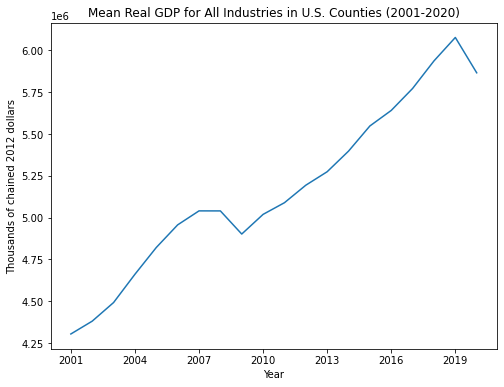

In [47]:
plt.figure(figsize=(8, 6))
plt.plot(rgdp_county_allindustry_mean["year"], rgdp_county_allindustry_mean["value"])
plt.xticks(np.arange(2001, 2021, 3))
plt.xlabel("Year")
plt.ylabel("Thousands of chained 2012 dollars")
plt.title("Mean Real GDP for All Industries in U.S. Counties (2001-2020)")
plt.show()

`pd.groupby().median()`

In [48]:
rgdp_county_allindustry_med = rgdp_county_allindustry.groupby("year").median().reset_index()

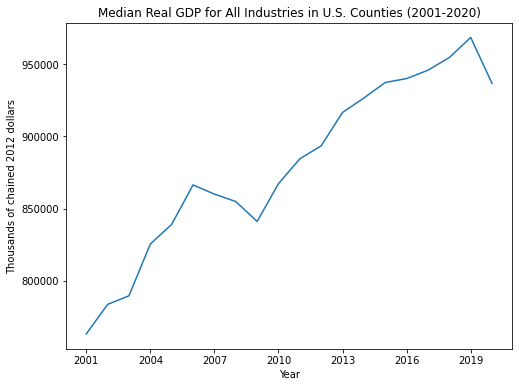

In [49]:
plt.figure(figsize=(8, 6))
plt.plot(rgdp_county_allindustry_med["year"], rgdp_county_allindustry_med["value"])
plt.xticks(np.arange(2001, 2021, 3))
plt.xlabel("Year")
plt.ylabel("Thousands of chained 2012 dollars")
plt.title("Median Real GDP for All Industries in U.S. Counties (2001-2020)")
plt.show()

## Part 7: Changes and percent changes

**Objectives:**  
1. TODO

Techniques: `pd.DataFrame.diff`, `pd.DataFrame.pct_change`

In [50]:
bea_regions = {
               1: "New England", 
               2: "Mideast", 
               3: "Great Lakes", 
               4: "Plains", 
               5: "Southeast", 
               6: "Southwest", 
               7: "Rocky Mountains", 
               8: "Far West"
              }

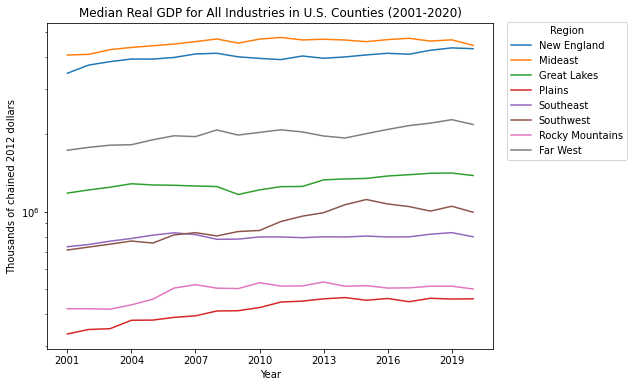

In [51]:
plt.figure(figsize=(8, 6))
for region in np.sort(rgdp_county_allindustry["Region"].unique()):
    rgdp_county_allindustry_region = rgdp_county_allindustry[rgdp_county_allindustry["Region"] == region]\
                                        .groupby("year").median()\
                                        .reset_index()
    plt.plot(rgdp_county_allindustry_region["year"], rgdp_county_allindustry_region["value"], label=bea_regions[region])
plt.xticks(np.arange(2001, 2021, 3))
plt.xlabel("Year")
plt.ylabel("Thousands of chained 2012 dollars")
plt.title("Median Real GDP for All Industries in U.S. Counties (2001-2020)")
plt.legend(title="Region", loc=(1.03, 0.58))
plt.yscale("log")
plt.show()

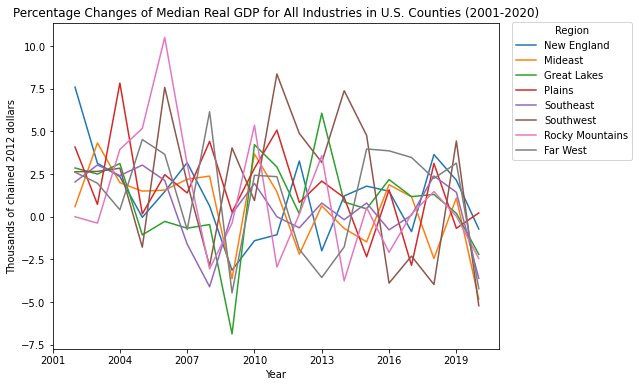

In [52]:
plt.figure(figsize=(8, 6))
for region in np.sort(rgdp_county_allindustry["Region"].unique()):
    rgdp_county_allindustry_region = rgdp_county_allindustry[rgdp_county_allindustry["Region"] == region]\
                                        .groupby("year").median()\
                                        .reset_index()
    plt.plot(rgdp_county_allindustry_region["year"][1:], 
             rgdp_county_allindustry_region.pct_change()["value"][1:] * 100, 
             label=bea_regions[region]
            )
plt.xticks(np.arange(2001, 2021, 3))
plt.xlabel("Year")
plt.ylabel("Thousands of chained 2012 dollars")
plt.title("Percentage Changes of Median Real GDP for All Industries in U.S. Counties (2001-2020)")
plt.legend(title="Region", loc=(1.03, 0.58))
plt.show()

## Part 8: Merge

**Objectives:**  
1. TODO

Techniques: `pd.merge`

In [53]:
county_geo = pd.read_csv("../data/uscounties_geo.csv")[["county_fips", "lat", "lng", "population"]]
county_geo

,county_fips,lat,lng,population
0,6037,34.3209,-118.2247,10040682
1,17031,41.8401,-87.8168,5169517
2,48201,29.8578,-95.3936,4680609
3,4013,33.3490,-112.4915,4412779
4,6073,33.0343,-116.7350,3323970
...,...,...,...,...
3138,35021,35.8579,-103.8202,432
3139,31117,41.5682,-101.0604,420
3140,48261,26.9285,-97.7017,391
3141,48269,33.6165,-100.2558,279


In [54]:
rgdp_county_allindustry_geo = rgdp_county_allindustry.merge(county_geo, left_on="GeoFIPS", right_on="county_fips")
rgdp_county_allindustry_geo

,GeoFIPS,GeoName,Region,LineCode,year,value,county_fips,lat,lng,population
0,1001,"Autauga, AL",5,1,2001,949800,1001,32.5349,-86.6427,55639
1,1001,"Autauga, AL",5,1,2002,984039,1001,32.5349,-86.6427,55639
2,1001,"Autauga, AL",5,1,2003,1008032,1001,32.5349,-86.6427,55639
3,1001,"Autauga, AL",5,1,2004,1170278,1001,32.5349,-86.6427,55639
4,1001,"Autauga, AL",5,1,2005,1195319,1001,32.5349,-86.6427,55639
...,...,...,...,...,...,...,...,...,...,...
61635,56045,"Weston, WY",7,1,2016,305446,56045,43.8405,-104.5678,6942
61636,56045,"Weston, WY",7,1,2017,300909,56045,43.8405,-104.5678,6942
61637,56045,"Weston, WY",7,1,2018,315332,56045,43.8405,-104.5678,6942
61638,56045,"Weston, WY",7,1,2019,322576,56045,43.8405,-104.5678,6942


## Part 9: Making simple visualizations!

**Objectives:**  
1. TODO

Techniques: 

In [75]:
rgdp_county_allindustry_geo_chg = rgdp_county_allindustry_geo[rgdp_county_allindustry_geo["year"] != 2001].copy()
rgdp_county_allindustry_geo_chg["value"] = rgdp_county_allindustry_geo[["value"]].pct_change().drop(index=np.arange(0, 61640, 20), axis=0)
rgdp_county_allindustry_geo_chg

,GeoFIPS,GeoName,Region,LineCode,year,value,county_fips,lat,lng,population
1,1001,"Autauga, AL",5,1,2002,0.036049,1001,32.5349,-86.6427,55639
2,1001,"Autauga, AL",5,1,2003,0.024382,1001,32.5349,-86.6427,55639
3,1001,"Autauga, AL",5,1,2004,0.160953,1001,32.5349,-86.6427,55639
4,1001,"Autauga, AL",5,1,2005,0.021397,1001,32.5349,-86.6427,55639
5,1001,"Autauga, AL",5,1,2006,0.068413,1001,32.5349,-86.6427,55639
...,...,...,...,...,...,...,...,...,...,...
61635,56045,"Weston, WY",7,1,2016,-0.156380,56045,43.8405,-104.5678,6942
61636,56045,"Weston, WY",7,1,2017,-0.014854,56045,43.8405,-104.5678,6942
61637,56045,"Weston, WY",7,1,2018,0.047931,56045,43.8405,-104.5678,6942
61638,56045,"Weston, WY",7,1,2019,0.022973,56045,43.8405,-104.5678,6942


In [92]:
def plot_counties(data, year):
    rgdp_county_year = data[data["year"] == year]
    rgdp_county_year = rgdp_county_year[(rgdp_county_year["value"] < 1) & (rgdp_county_year["value"] > -1)]
    
    values = rgdp_county_year["value"].values
    values_std = (values - min(values)) / (max(values) - min(values))
    color = plt.get_cmap('coolwarm')
    county_colors = color(values_std)
    
    plt.figure(figsize=(15,10))
    plt.scatter(rgdp_county_year["lng"], rgdp_county_year["lat"], 
                c=county_colors, s=20, alpha=0.8)
    plt.title(f"Percentage Changes of Real GDP for All Industries in U.S. Counties ({year})")
    plt.show()

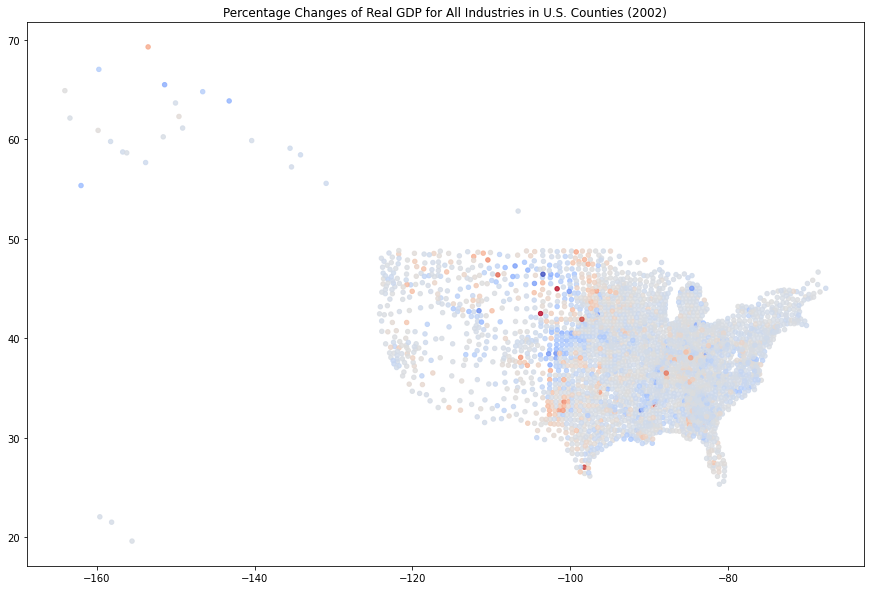

In [93]:
plot_counties(rgdp_county_allindustry_geo_chg, 2002)

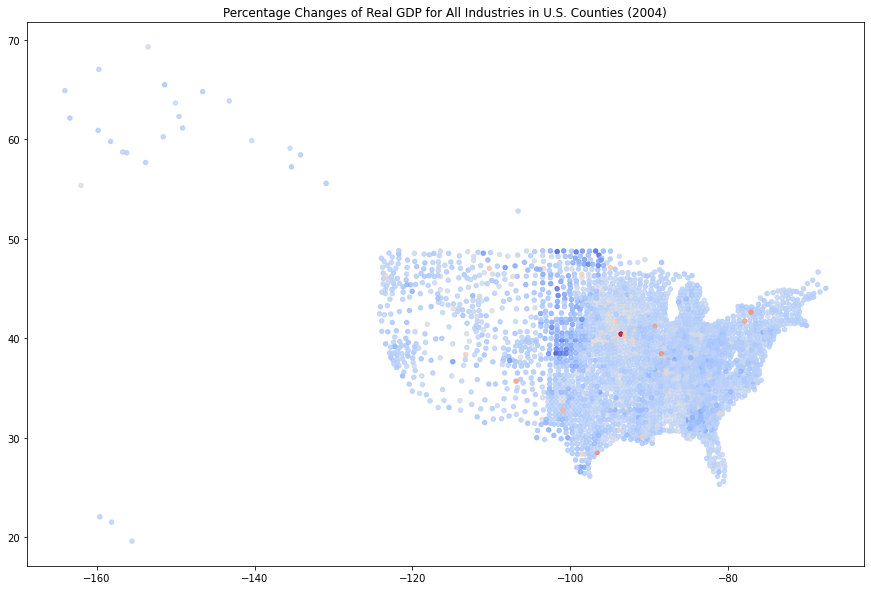

In [84]:
plot_counties(rgdp_county_allindustry_geo_chg, 2004)

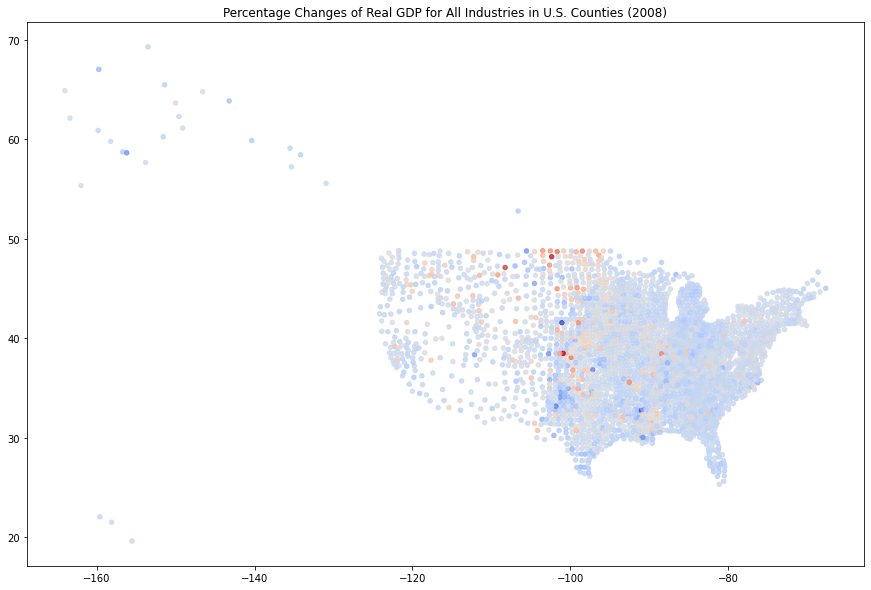

In [85]:
plot_counties(rgdp_county_allindustry_geo_chg, 2008)

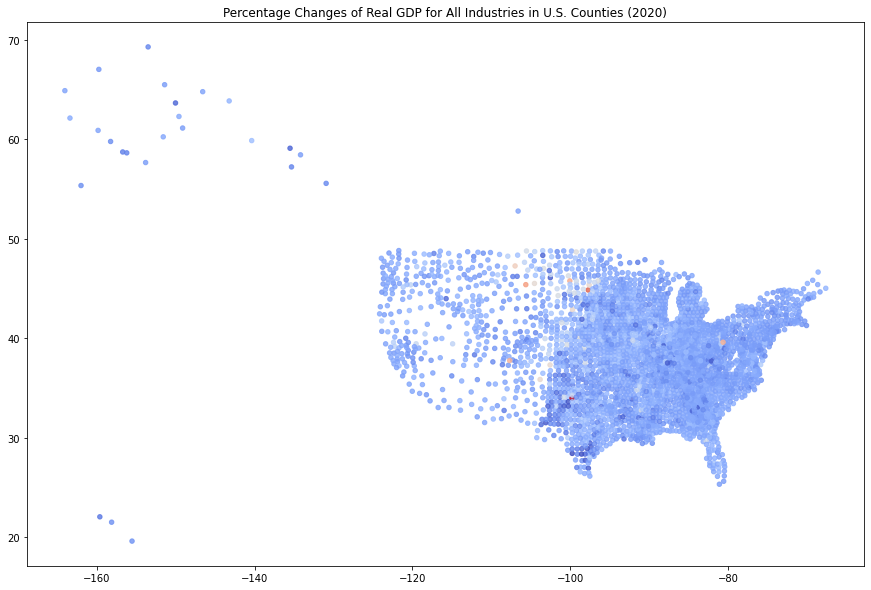

In [86]:
plot_counties(rgdp_county_allindustry_geo_chg, 2020)